# Solar Radiation Prediction


## Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns
import sklearn


## Reading the Data 

In [2]:
sun = pd.read_csv('../DataSets/SolarPrediction.csv')
sun

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00



## Understanding the Data 

In [3]:
sun.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [4]:
sun.shape

(32686, 11)

In [5]:
sun.size

359546

In [6]:
sun.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [7]:
sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [8]:
sun.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [9]:
sun.nunique()

UNIXTime                  32686
Data                        118
Time                       8299
Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
TimeSunRise                  51
TimeSunSet                   56
dtype: int64

In [10]:
sun.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


In [11]:
sun.isnull().any()

UNIXTime                  False
Data                      False
Time                      False
Radiation                 False
Temperature               False
Pressure                  False
Humidity                  False
WindDirection(Degrees)    False
Speed                     False
TimeSunRise               False
TimeSunSet                False
dtype: bool


## Visualization 

<AxesSubplot:>

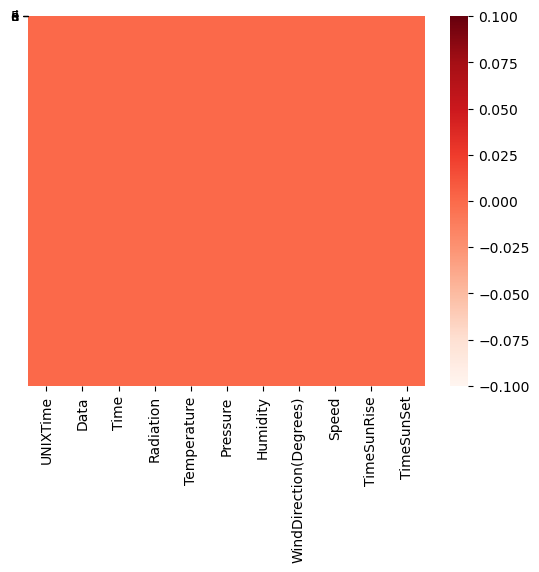

In [12]:
sns.heatmap(sun.isnull(), yticklabels = 'False', cmap = 'Reds')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

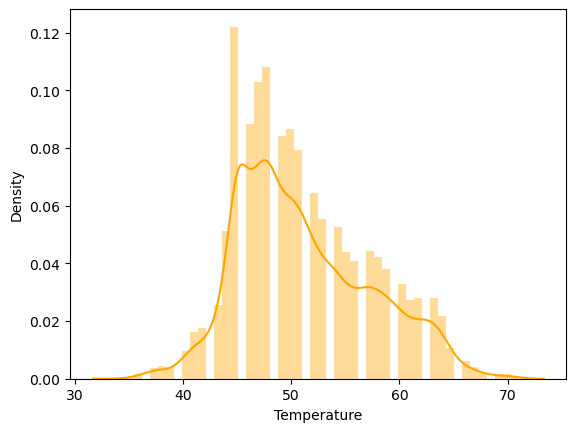

In [13]:
sns.distplot(sun['Temperature'], color = 'orange')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure', ylabel='Density'>

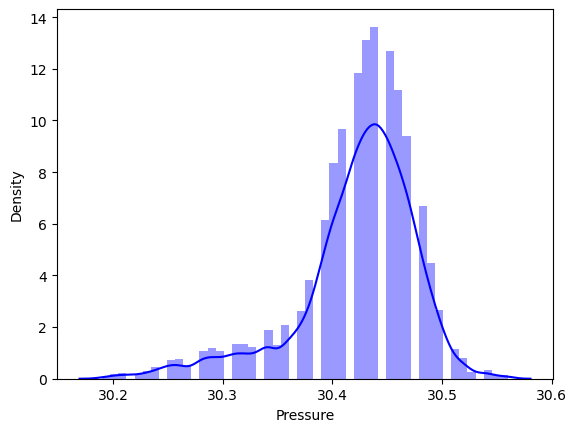

In [14]:
sns.distplot(sun['Pressure'], color = 'blue')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

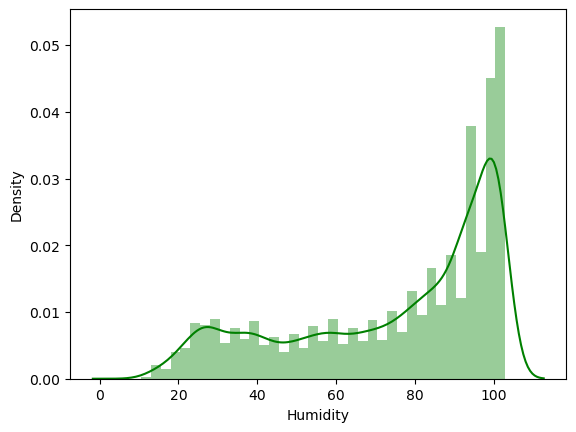

In [15]:
sns.distplot(sun['Humidity'], color = 'green')

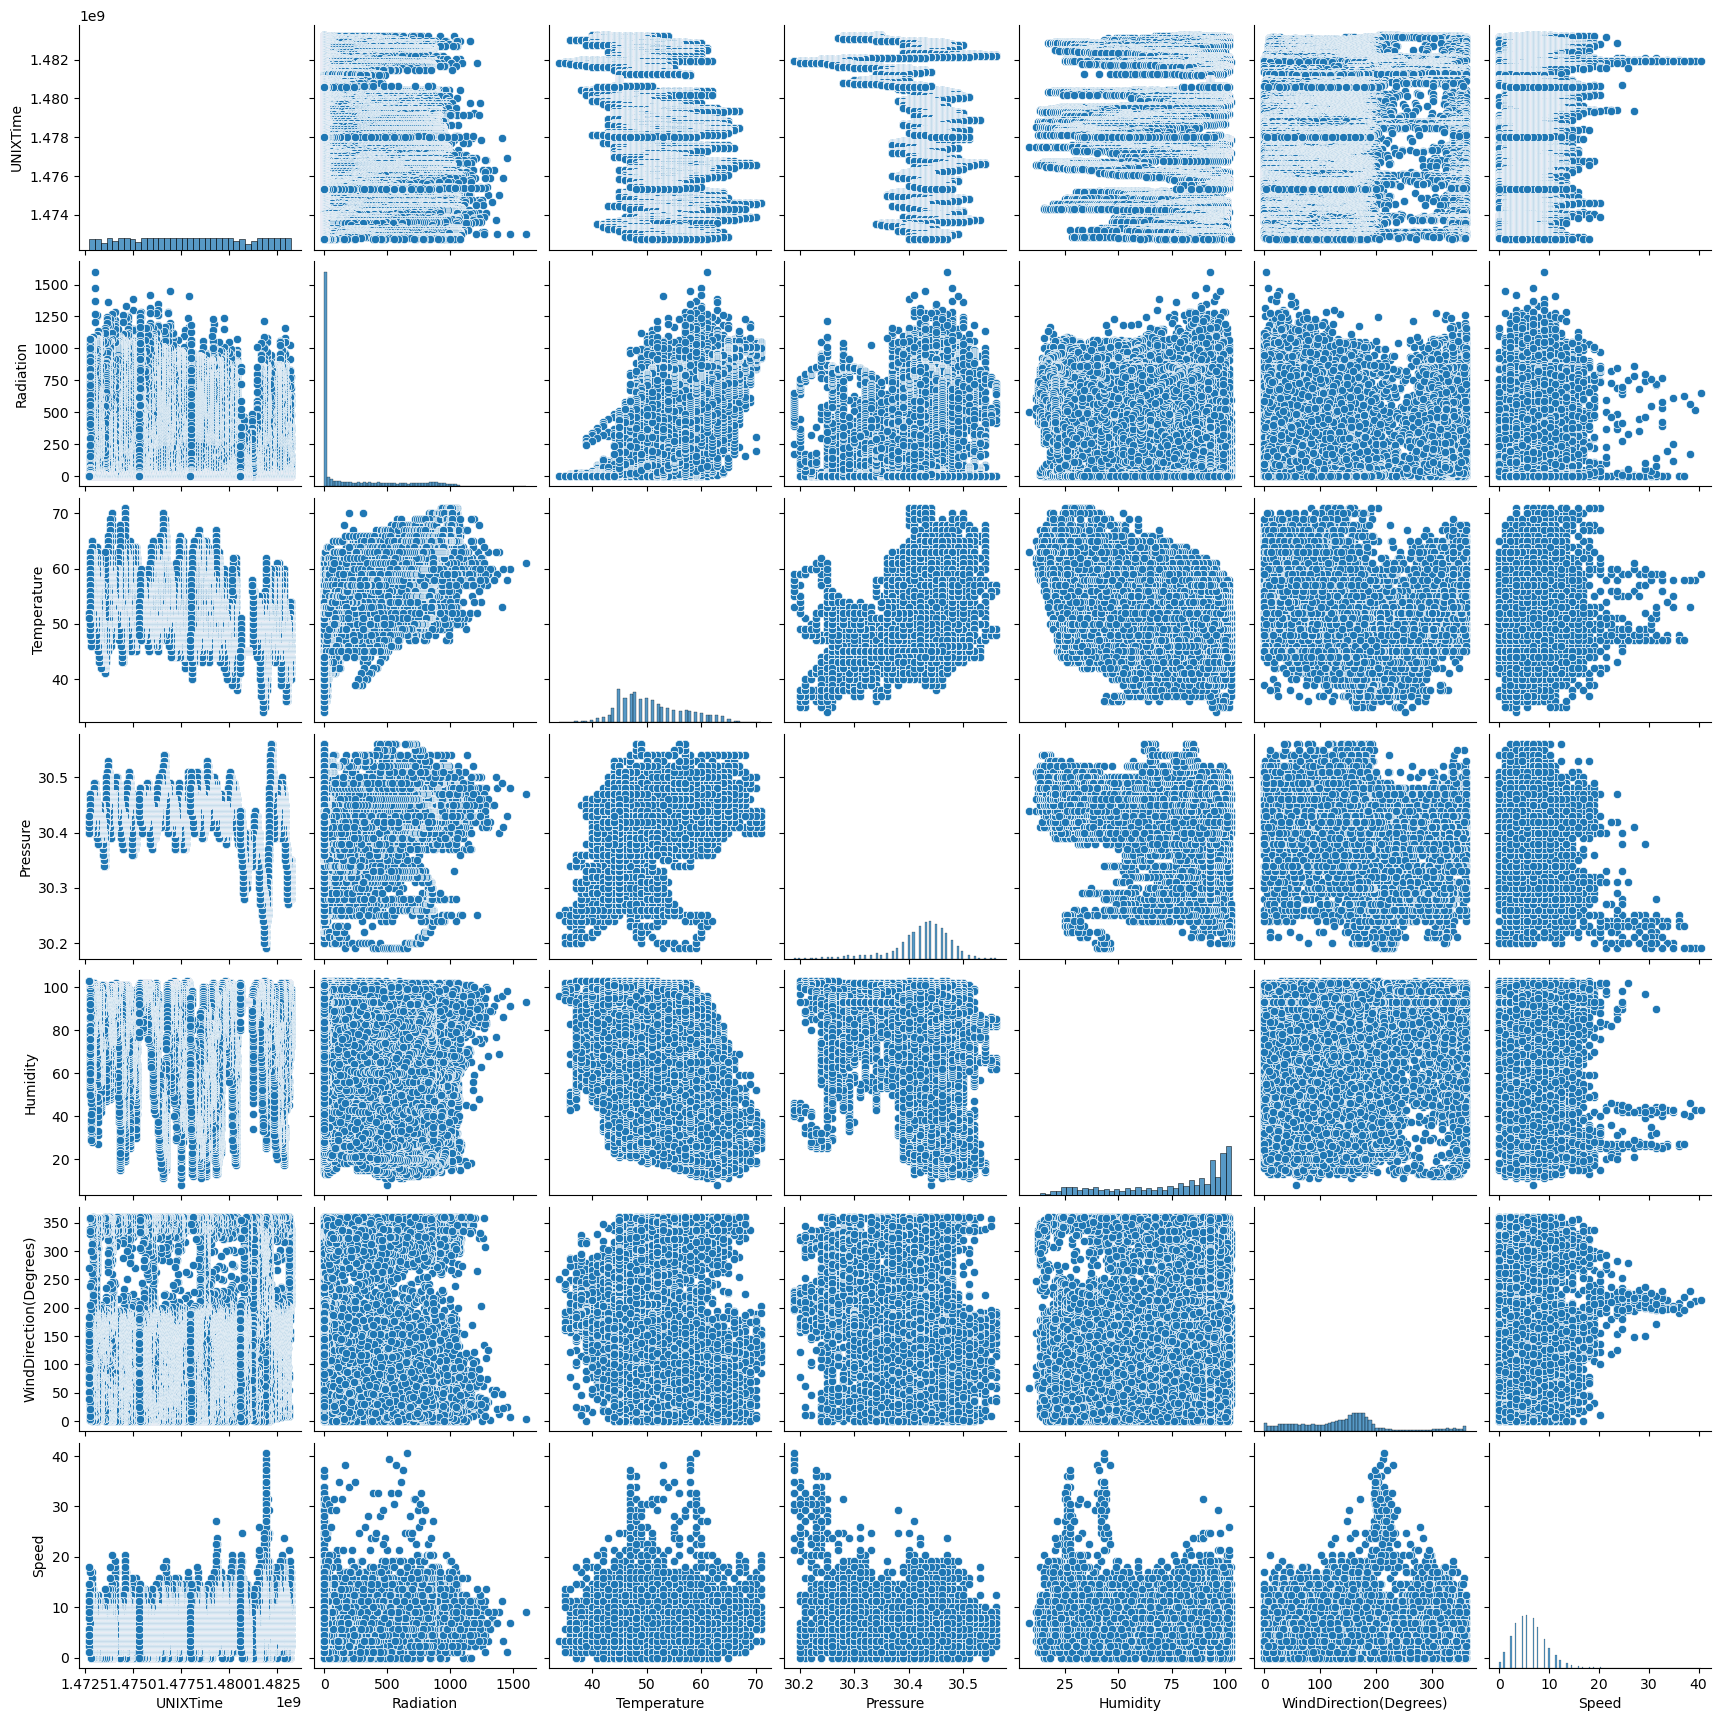

In [16]:
sns.pairplot(sun)

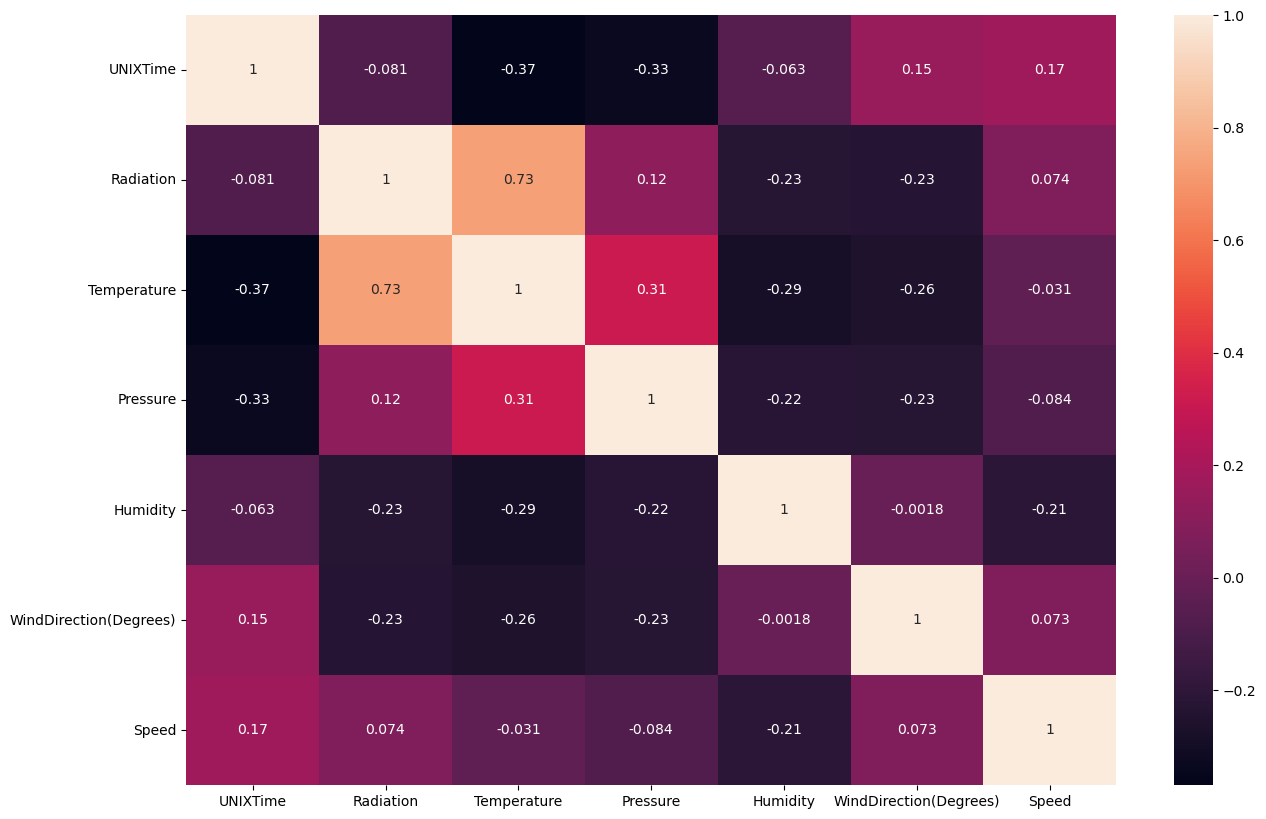

In [17]:
mtp.figure(figsize=(15,10))
sns.heatmap(sun.corr(), yticklabels = 'auto', annot = True)
mtp.show()


## Splitting the Data into Dependent and Independent Variables 

In [18]:
x = sun.drop(['Data', 'Time', 'Radiation', 'TimeSunRise', 'TimeSunSet'], axis = 1)
y = sun['Radiation']

In [19]:
x.shape

(32686, 6)

In [20]:
y.shape

(32686,)


## Feature Importance 

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.14143248 0.51059236 0.05948317 0.10826311 0.1410662  0.03916268]


In [22]:
feat_imp = pd.Series(model.feature_importances_, index = x.columns)

<AxesSubplot:>

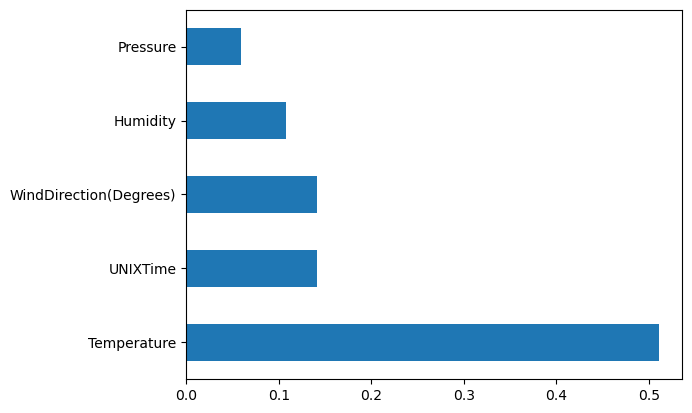

In [23]:
feat_imp.nlargest(5).plot(kind = 'barh')


## Training and Testing the Data 

In [24]:
features = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
label = ['Radiation']
x = sun[features]
y = sun[label]

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)


# 1. Linear Regression 

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()


### Prediction 

In [28]:
ypred_train = lr.predict(x_train)
ypred_test = lr.predict(x_test)


### Accuracy

In [29]:
from sklearn import metrics
print('Accuracy of Training Data: ', metrics.r2_score(y_train, ypred_train)*100)
ac1 = metrics.r2_score(y_test, ypred_test)*100
print('Accuracy of Testing Data: ', ac1)

Accuracy of Training Data:  56.50680254695581
Accuracy of Testing Data:  56.78128871445479



### Error 

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, ypred_test)*100
print('Mean Square Error: ', mse)

Mean Square Error:  4347719.932853596



# 2. Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)


### Prediction 

In [32]:
ypred_train = dt.predict(x_train)
ypred_test = dt.predict(x_test)


### Accuracy

In [33]:
print('Accuracy of Training Data: ', metrics.r2_score(y_train, ypred_train)*100)
ac2 = metrics.r2_score(y_test, ypred_test)*100
print('Accuracy of Testing Data: ', ac2)

Accuracy of Training Data:  66.61756372459058
Accuracy of Testing Data:  66.6854677492044



### Error 

In [34]:
mse = mean_squared_error(y_test, ypred_test)
print('Mean Square Error: ', mse)

Mean Square Error:  33513.784102331956



# 3. KNN Regressor 

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)


### Prediction 

In [36]:
ypred_train = knn.predict(x_train)
ypred_test = knn.predict(x_test)


### Accuracy 

In [37]:
print('Accuracy of Training Data: ', metrics.r2_score(y_train, ypred_train)*100)
ac3 = metrics.r2_score(y_test, ypred_test)*100
print('Accuracy of Testing Data: ', ac3)

Accuracy of Training Data:  77.759236257982
Accuracy of Testing Data:  72.794628740011



### Error  

In [38]:
mse = mean_squared_error(y_test, ypred_test)
print('Mean Sqaure Error: ', mse)

Mean Sqaure Error:  27368.084653485825



# Comparing the Accuracy 

In [39]:
accuracy = {ac1:'Linear Regression', ac2:'Decision Tree Regressor', ac3:'KNN Regressor'}

<AxesSubplot:>

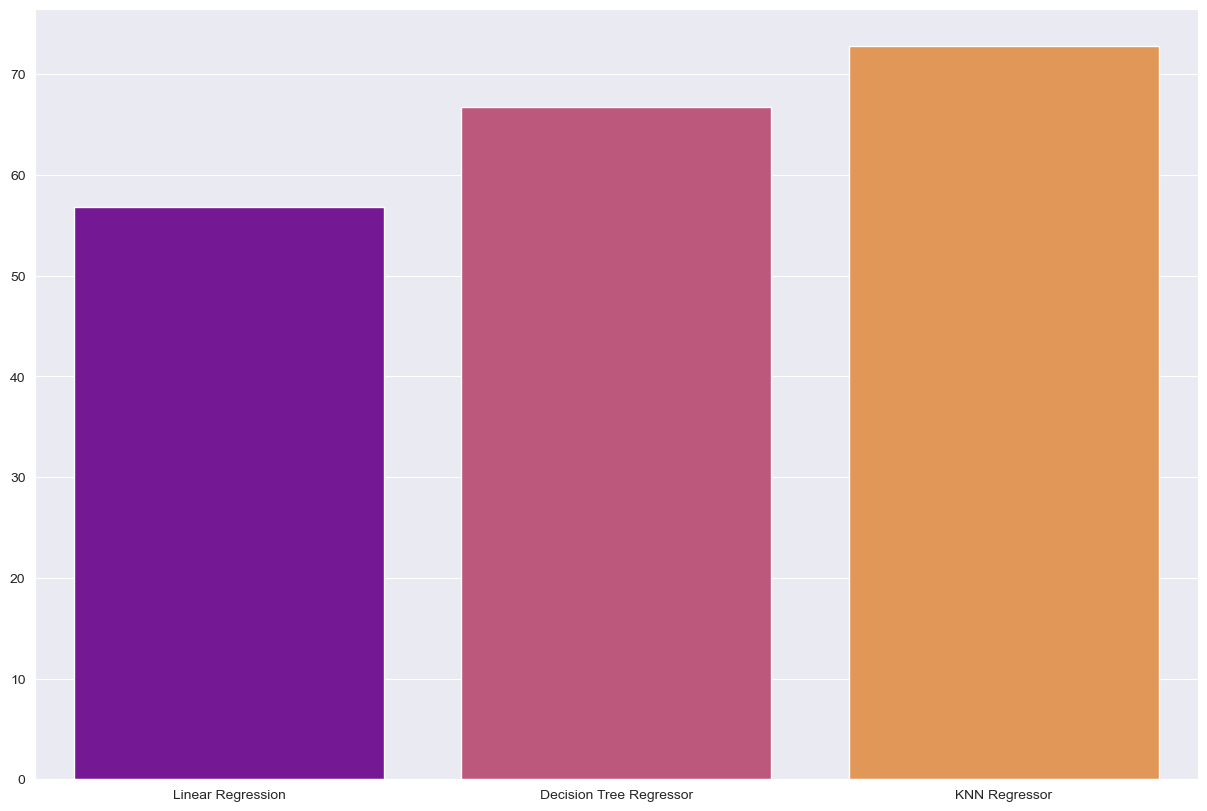

In [40]:
sns.set_style('darkgrid')
mtp.figure(figsize=(15,10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x = model_accuracies, y = model_names, palette = 'plasma')

Hence, **KNN Regressor** has the Highest Accuracy i.e., **72.79%**.


Therefore, we will save the model. 